# Wang Haoyu

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
df

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
36767,2023-03-12 19:00:00,6500,6643,1407,111,3084,933,1047,0,60
36768,2023-03-12 20:00:00,6471,6484,1408,58,2983,933,1042,0,60
36769,2023-03-12 21:00:00,6194,6413,1406,39,2938,935,1031,0,62
36770,2023-03-12 22:00:00,5708,6217,1406,8,2823,917,1001,0,61


## Question: What can we say between the production and consumption?

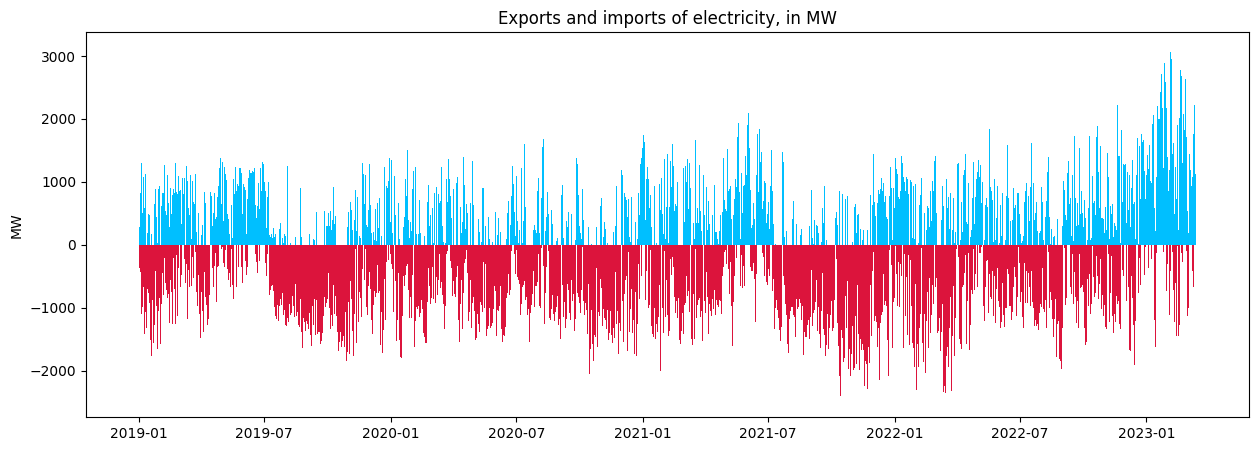

In [29]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
df["delta"] = df["Production"] - df["Consumption"]

plt.rcParams["figure.figsize"] = (15,5)

plt.bar(
    df.index, df['delta'],
    color=np.where(df['delta'] > 0, 'deepskyblue', 'crimson')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

df.drop(["delta"], axis=1, inplace=True)

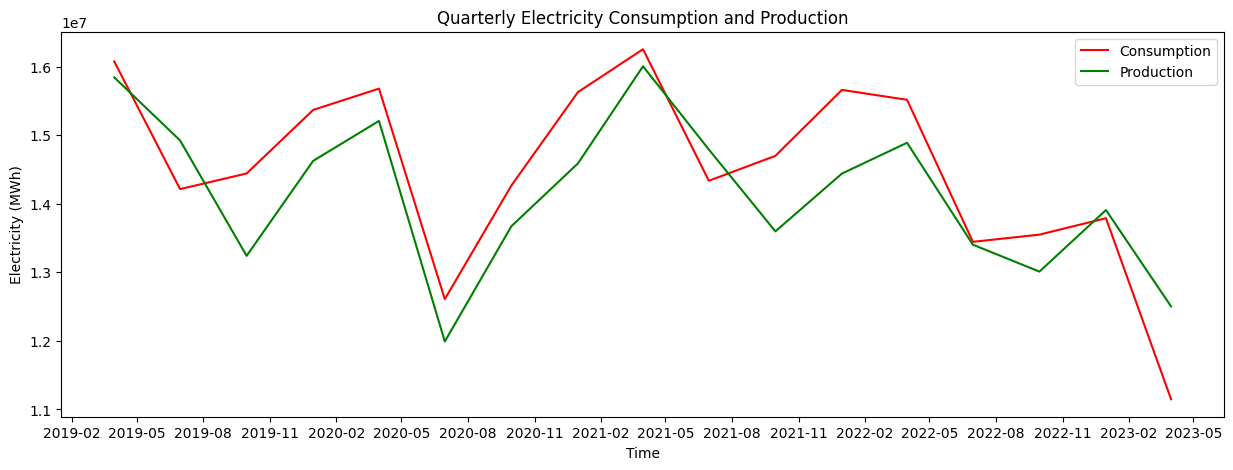

In [36]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)
# 将 "timestamp" 列设置为索引
# 计算每个季度的电力消费和生产总量
quarterly_data = df.resample('Q').sum()

# 生成折线图
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(quarterly_data.index, quarterly_data['Consumption'], label='Consumption', color='red')
ax.plot(quarterly_data.index, quarterly_data['Production'], label='Production', color='green')
ax.set_title('Quarterly Electricity Consumption and Production')
ax.set_xlabel('Time')
ax.set_ylabel('Electricity (MWh)')
ax.legend()

# 设置 x 轴的刻度
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.show()


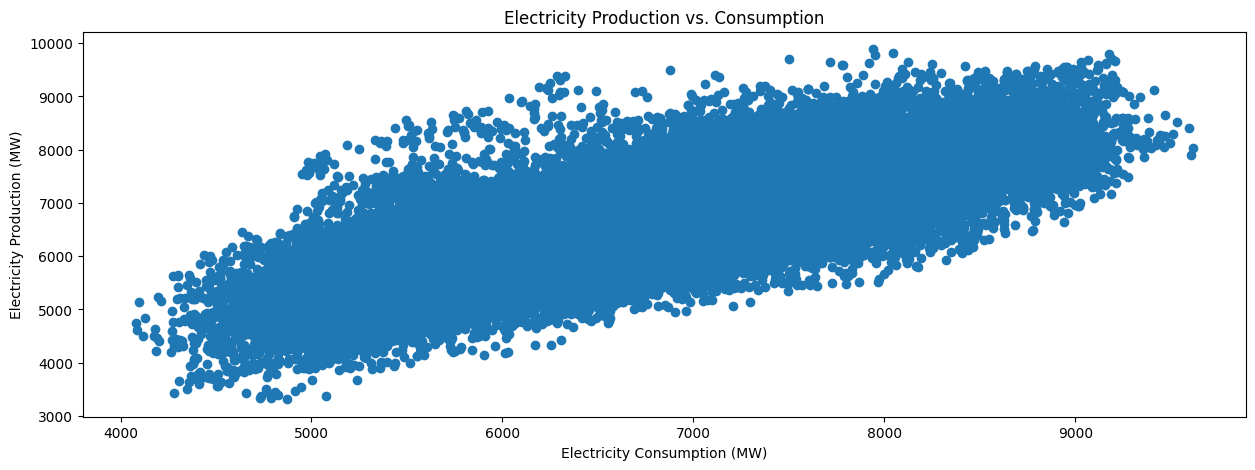

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("electricityConsumptionAndProductioction.csv")
plt.scatter(df["Consumption"], df["Production"])
plt.xlabel("Electricity Consumption (MW)")
plt.ylabel("Electricity Production (MW)")
plt.title("Electricity Production vs. Consumption")

plt.show()


We can see that the electricity output is basically lower than the consumption, and from the third graph we can see that the points basically rise along a straight line, and we can see that there is a linear relationship between the two, when the consumption rises, the production also rises.

## Question: What hourly periods are there significant differences between power consumption and production? Are there any significant peaks and valleys?

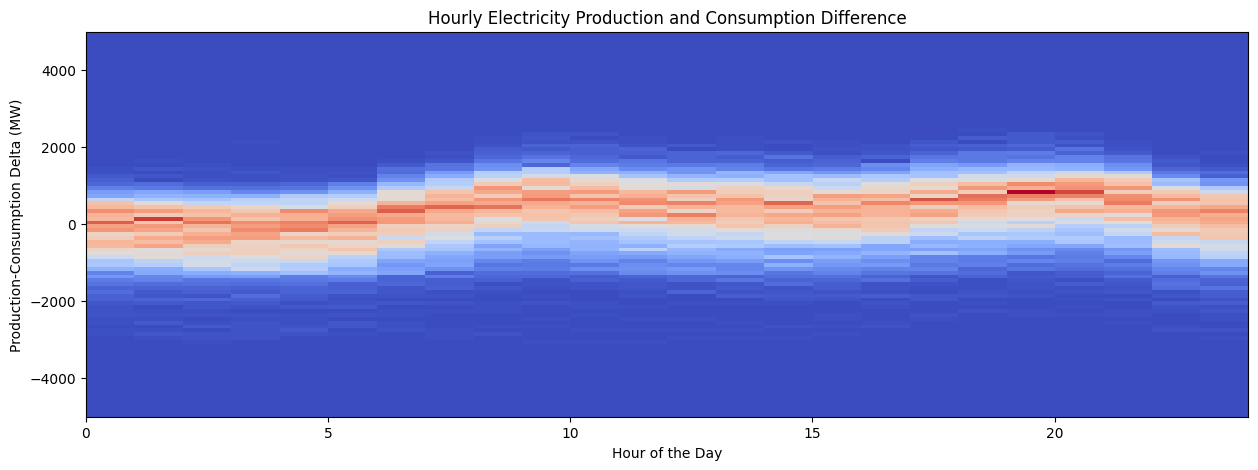

In [89]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
df["DateTime"] = pd.to_datetime(df["DateTime"])
df.set_index("DateTime", inplace=True)

hourly_data = df.resample("H").sum()

hourly_data["delta"] = hourly_data["Production"] - hourly_data["Consumption"]

heatmap, xedges, yedges = np.histogram2d(
    hourly_data.index.hour,
    hourly_data["delta"],
    bins=[24, 100],
    range=[[0, 24], [-5000, 5000]]
)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, cmap="coolwarm", extent=extent, aspect="auto")
plt.xlabel("Hour of the Day")
plt.ylabel("Production-Consumption Delta (MW)")
plt.title("Hourly Electricity Production and Consumption Difference")
plt.show()


This graph shows the difference between electricity production and consumption at different hours of the day, and the magnitude of this difference. The darker the color represents the larger the difference for that hour. It can be seen that in the early hours of the day and at night the difference between electricity production and consumption is smaller, while in the daytime, especially in the afternoon, the difference is larger and there are clear peaks and troughs. In addition, this graph shows that there are cyclical variations in the relationship between electricity production and consumption, with more pronounced troughs occurring, for example, around 7:00 am and 4:00 pm.

## Question: Is wind power affected by the seasons ?

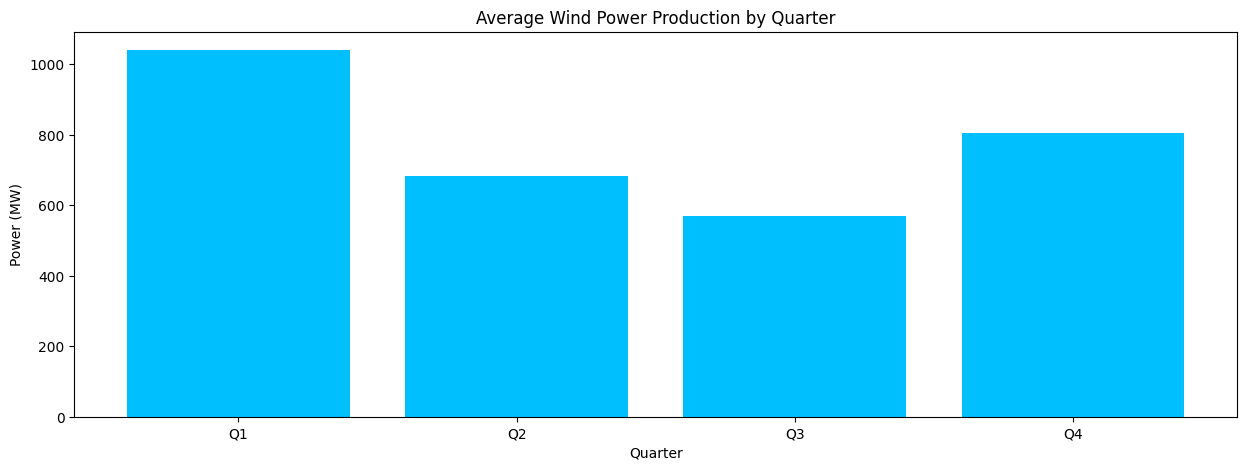

In [86]:

# 读取数据
df = pd.read_csv("electricityConsumptionAndProductioction.csv")


# 将 "DateTime" 列转换为 Pandas 时间戳
df["DateTime"] = pd.to_datetime(df["DateTime"])

# 将数据帧的 "DateTime" 列设置为索引
df.set_index("DateTime", inplace=True)

# 选择风力发电相关的列，并组成新的数据帧
wind_df = df[["Wind"]]

# 按季度计算风力发电的平均值
quarterly_data = wind_df.groupby(wind_df.index.quarter)["Wind"].mean()

# 可视化结果
plt.bar(
    ['Q1', 'Q2', 'Q3', 'Q4'],
    quarterly_data,
    color='deepskyblue'
)
plt.title("Average Wind Power Production by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Power (MW)")
plt.show()




Yes, we can see that output is highest in the first quarter of the year, gradually declines in the second and third quarters, and starts to pick up in the fourth quarter, which may be correlated with the weather in each quarter.

## Question: Percentage of each type of power generation.

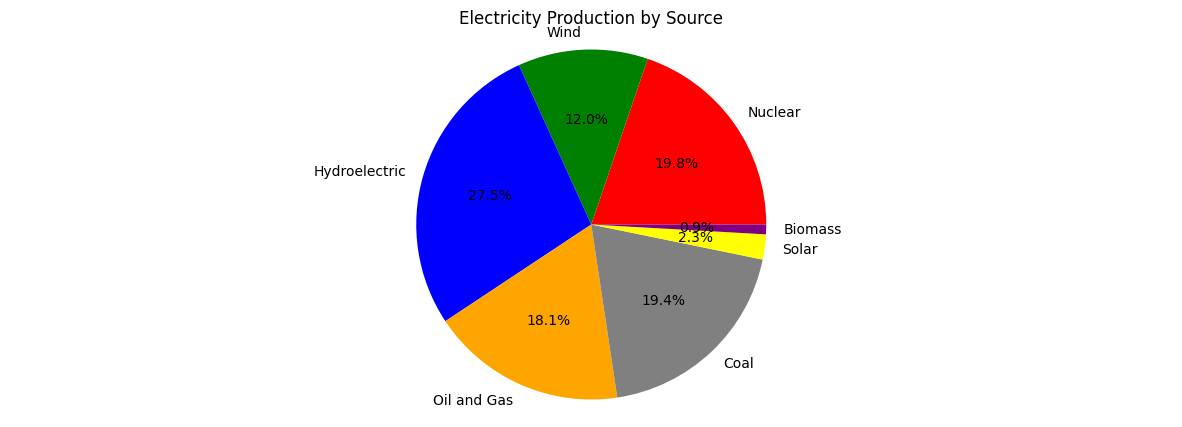

In [100]:
df = pd.read_csv("electricityConsumptionAndProductioction.csv")
production_df = df[["Nuclear", "Wind", "Hydroelectric", "Oil and Gas", "Coal", "Solar", "Biomass"]]
production_totals = production_df.sum()
colors = ["red", "green", "blue", "orange", "gray", "yellow", "purple"]

plt.pie(production_totals, labels=production_totals.index, colors=colors, autopct='%1.1f%%')
plt.title("Electricity Production by Source")
plt.axis('equal')
plt.show()


The pie chart shows that hydroelectric power generation accounts for the largest share, followed by nuclear, coal and oil and gas, wind only accounts for 12 percent, solar 2.3 percent and biomass 0.9 percent. The percentage of non-green energy is higher, while the percentage of green energy is relatively low.

# Conclusion

- the largest amount of electricity production is generated by hydroelectric power, followed by nuclear, coal-fired and natural gas-fired power;

- Electricity consumption shows a clear daily and weekly cyclical variation;

- significant differences in electricity consumption by season, with relatively high consumption in summer and winter;

- Large differences in electricity production and consumption between hourly periods, with significant peaks and valleys, especially during the day and night;

- The largest share of hydroelectric power generation and a relatively low share of green energy.

These findings can provide useful information to the energy industry and policy makers to help them better understand how electricity is produced and consumed, and to optimize the production and distribution of energy.